In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

### AUTO ENCODER


n_hidden = 3
n_output = 8
data = -np.ones([8,8])
for i in range(8):
  data[i,i] = 1

data_output = -np.ones([8,8])
for i in range(8):
  data_output[i,i] = 1  


Object `weights` not found.


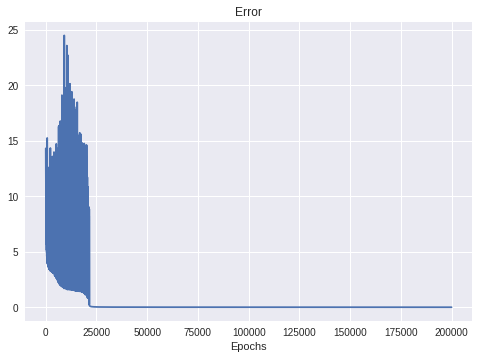

In [0]:
### NEW VERSION, WORKS
epoch = 200000
n_hiddenNodes = 3;
n_outputnodes = 8;
eta=0.2;

#Restructuring data
transData =  np.transpose(data)

dataInput = data  
labels = data_output

# There are (L+1) X M weights between input and hidden
# There are (M+1) X N weights between hidden and output
L = np.shape(dataInput)[1]
M = n_hiddenNodes
N = np.shape(labels)[1]

weights_hid = np.random.uniform(low=0, high=1, size=((L+1), n_hiddenNodes)) # [3,2] (x,y,bias)
weights_out = np.random.uniform(low=0, high=1, size=((n_hiddenNodes+1),N))  # [3,1]

dataInput = np.concatenate((dataInput,-np.ones((len(dataInput),1))),axis=1)  # [100,3]

hidden = []
hidden2 = []
output = []
output_signal = []
hidden_n = []
output_n = []
error_storage = [] #np.zeros(epoch)
error_storage_test = np.zeros(epoch)
difference = []

plotWeights = []

def activationArr(arr):
  return np.where(arr>0,1,0) 
# Defining the sigmoid function
def sigmoid(value):
  return (2/(1.0+np.exp(-1*value)))-1

# Defining function for forward pass
def feedForwardValue(inp):
  
  hidden = np.dot(inp, weights_hid);                                            # [100,2]        [100,3] X [3,2] 
  hidden = sigmoid(hidden)                                                      # [100,2]                           (100 that fired or not in 2 hidden neuron)

  hidden2 = np.concatenate((hidden,-np.ones((np.shape(inp)[0],1))),axis=1)      #[100,3] # Add the bias column

  output = np.dot(hidden2,weights_out)                                          # [100,1]        [100,3] X [3,1]    (100 that fired or not in 1 output neuron)
  output_signal =  sigmoid(output)                                              # [100,1]
  
  return hidden2, output_signal;  # [100,3],[100,1]

plt.figure(1)
#Calling forward pass
for i in range(epoch): 
  
  hidden_n,output_n = feedForwardValue(dataInput)                               # [100,3],[100,1]
  error = np.sum((output_n-labels)**2)*(0.5) 
  
  
  # Calculating deltao  
  deltao = np.multiply(output_n-labels,(1+output_n)*(1-output_n)*0.5)                   # [100,1]        [100,1] * [100,1]
  
  # Calculating deltah
  hidden_n_subtract = 1 - hidden_n                                              # [100,3]
  derivative =   0.5*np.multiply(1 + hidden_n,hidden_n_subtract)                        # [100,3]        [100,3] * [100,3]
  deltah = np.multiply(derivative,np.dot(deltao,np.transpose(weights_out)))     # [100,3]        [100,3] * [100,3]

  # Removing the bias-column
  
  deltah_biasRemove = np.delete(deltah, (2), axis=1)                            # [100,2]        Get rid of last column
  
  # Weight updates
  
  weights_hid -= eta*np.matmul(np.transpose(dataInput), deltah_biasRemove)      # [3,2]          [3,100] X [100,2]
  weights_out -= eta*np.matmul(np.transpose(hidden_n),deltao)                   # [3,1]          [3,100] X [100,1]
  error_storage.append(error)
  

plt.figure(2)
plt.plot(error_storage)
plt.title('Error')
plt.xlabel('Epochs')


# TODO :Shuffle

# understand the internal code
# For that, you can inspect the activations of the hidden layer corresponding to input patterns. 
# You could also examine the weight matrix for the rst layer. Can you deduce anything from the sign of the weights?



In [7]:
print(np.round(np.delete(hidden_n, (3), axis=1),2)  )  # The third column indicates that the third neuron fires the same value independent of the inputs <<< Neglect it, acts like bias, works with two neurons aswell??
  
print(np.round(weights_hid,2)  )

print(np.round(output_n,2))


[[ 1.   -0.52 -0.93]
 [-0.27  1.   -0.93]
 [-0.51 -1.   -0.93]
 [ 0.51 -1.   -0.95]
 [-1.    0.52 -0.94]
 [ 0.56  1.   -0.96]
 [-1.   -0.39 -0.95]
 [ 1.    0.48 -0.93]]
[[ 5.18 -0.52  0.64]
 [-0.44  5.41  0.69]
 [-0.72 -4.34  0.63]
 [ 0.4  -6.24  0.47]
 [-3.67  0.64  0.61]
 [ 0.47  5.23  0.34]
 [-6.49 -0.35  0.48]
 [ 5.18  0.58  0.68]
 [-0.24 -0.28  0.11]]
[[ 0.99 -1.   -1.   -0.99 -1.   -1.   -1.   -0.99]
 [-1.    0.98 -1.   -1.   -0.99 -0.99 -1.   -1.  ]
 [-1.   -1.    0.98 -0.99 -1.   -1.   -0.99 -1.  ]
 [-0.99 -1.   -0.99  0.99 -1.   -1.   -1.   -1.  ]
 [-1.   -0.99 -1.   -1.    0.98 -1.   -0.99 -1.  ]
 [-1.   -0.99 -1.   -1.   -1.    0.99 -1.   -0.99]
 [-1.   -1.   -0.99 -1.   -0.99 -1.    0.99 -1.  ]
 [-0.99 -1.   -1.   -1.   -1.   -0.99 -1.    0.99]]
